In [1]:
import gridworld
import matplotlib.pyplot as plt
import numpy as np

In [8]:
def plot_mean_and_std(q_values_mc_list, q_values_sarsa_list):
    mean_mc = np.mean(q_values_mc_list, axis=0)
    std_mc = np.std(q_values_mc_list, axis=0, ddof=1)
    mean_sarsa = np.mean(q_values_sarsa_list, axis=0)
    std_sarsa = np.std(q_values_sarsa_list, axis=0, ddof=1)
    # Plot the mean for MC
    plt.plot(range(len(mean_mc)), mean_mc, label='Monte Carlo')
    # Show the standard deviation for MC
    plt.fill_between(range(len(mean_mc)), mean_mc - std_mc, mean_mc + std_mc, alpha=0.2)
    # Plot the mean for SARSA
    plt.plot(range(len(mean_sarsa)), mean_sarsa, label='SARSA')
    # Show the standard deviation for SARSA
    plt.fill_between(range(len(mean_sarsa)), mean_sarsa - std_sarsa, mean_sarsa + std_sarsa, alpha=0.2)
    plt.xlabel('Episodes')
    plt.ylabel('Q-value (mean & std)')
    plt.title('Bias and Variance')
    plt.legend()
    plt.show()

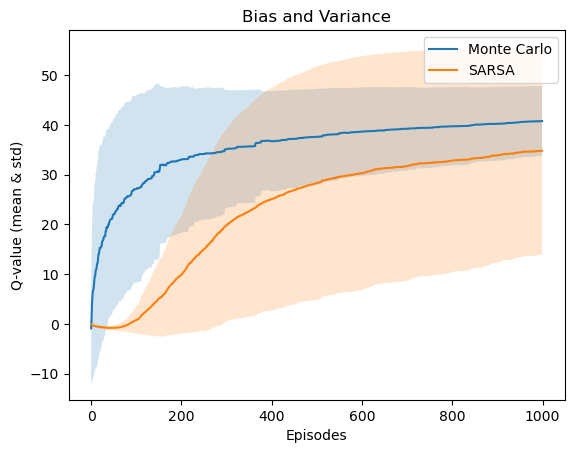

In [9]:
q_values_mc_list = []
q_values_sarsa_list = []
for i in range(100):
    q_values_mc, q_values_sarsa = gridworld.main()
    q_values_mc_list.append(q_values_mc)
    q_values_sarsa_list.append(q_values_sarsa)
plot_mean_and_std(q_values_mc_list, q_values_sarsa_list)

## Interpreting the results

In general, Monte Carlo control is a low-bias, high variance algorithm while 1-Step SARSA is high-bias, low variance. We can see this in the plot above.

Monte Carlo's mean fluctuates in the early episodes due to high variance, but converges to the true Q value as number of episodes increases. Also, its standard deviation starts high and decreases over time. We can also see that it is low bias, as the mean gets close to the true Q value pretty quickly.

In contrast, SARSA's mean fluctuates less, since it is low variance. Its standard deviation starts low and increases over time.
We can see its bias since it ends in a lower mean compared to Monte Carlo.